In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'train_processed.csv')
df.head(5)

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontageNaN,MasVnrAreaNaN,GarageYrBltNaN
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,...,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,...,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,...,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,...,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,...,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0


In [3]:
y = df['SalePrice']
x = df.drop(['Id','SalePrice'],axis=1)


Text(0, 0.5, 'cumulative explained variance')

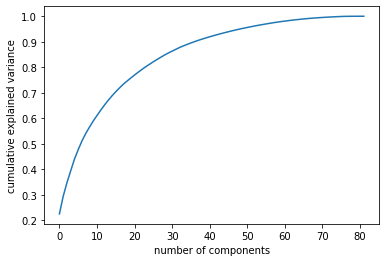

In [4]:
from sklearn.decomposition import PCA
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [5]:
pca = PCA(50)  # project from 84 to 40 dimensions
X_pca = pca.fit_transform(x)
print(X_pca.shape)

(1460, 50)


In [6]:
pca.explained_variance_ratio_.sum()

0.9529292039822849

In [7]:
principalDf = pd.DataFrame(data = X_pca)
principalDf

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.822609,0.583752,0.164552,-0.180034,-0.186048,0.362798,0.012371,-0.302041,-0.026932,-0.113226,...,-0.036102,-0.027997,0.002126,0.001745,-0.011852,0.015123,0.025593,-0.023698,0.007782,0.045958
1,0.073519,-0.319406,0.012247,-0.004697,-0.188833,-0.614229,0.130776,0.131879,0.165503,-0.212177,...,0.243215,-0.040121,-0.079597,-0.137442,0.031383,0.012100,0.150971,-0.063865,-0.042137,0.014619
2,-0.961834,0.375955,0.144042,-0.253384,-0.013944,0.109698,-0.014365,0.047395,0.128573,-0.130521,...,-0.050128,-0.026446,0.014678,-0.006187,-0.052236,0.076667,-0.001408,0.014109,0.021420,0.051377
3,0.361620,-0.246048,0.129061,-0.555287,0.088542,-0.363539,-0.101146,0.100532,0.050457,-0.170606,...,0.182635,0.192160,-0.134914,0.333424,-0.107130,0.024090,-0.290219,0.223177,0.023602,-0.250976
4,-1.219853,0.195589,0.172429,-0.290704,0.182889,0.002788,-0.021839,0.157691,0.204560,-0.188411,...,-0.060777,0.001234,0.026485,0.022407,0.097231,-0.013760,0.013582,-0.055673,-0.008839,-0.035984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.672479,0.429184,0.174668,-0.346788,-0.152747,0.173111,-0.380030,0.063333,-0.063786,-0.029552,...,-0.006147,-0.009233,-0.023852,-0.021570,-0.059828,0.013421,-0.010786,0.020749,0.026990,0.007715
1456,-0.006866,-0.215937,-0.103675,0.153961,-0.368893,0.318264,0.475005,0.637612,0.170649,-0.175894,...,0.083808,-0.001114,0.008272,-0.058031,-0.021117,0.026920,-0.000436,0.039356,0.011204,-0.053508
1457,-0.508909,0.156039,0.054134,-0.438118,-0.008111,0.408721,0.542217,0.471601,-0.213313,-0.000789,...,-0.069262,0.182454,0.233769,-0.011844,0.216186,0.244869,0.182768,0.094329,0.175343,0.073547
1458,0.455347,-0.413589,-0.660621,0.396669,-0.140331,0.303085,0.534291,-0.462431,-0.133605,-0.233379,...,0.093987,0.048277,-0.237106,-0.133675,-0.091033,-0.001461,-0.111471,0.266389,-0.074687,-0.025564


In [8]:
total_df = pd.concat([principalDf,df['SalePrice']],axis=1)
total_df

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,SalePrice
0,-0.822609,0.583752,0.164552,-0.180034,-0.186048,0.362798,0.012371,-0.302041,-0.026932,-0.113226,...,-0.027997,0.002126,0.001745,-0.011852,0.015123,0.025593,-0.023698,0.007782,0.045958,12.247694
1,0.073519,-0.319406,0.012247,-0.004697,-0.188833,-0.614229,0.130776,0.131879,0.165503,-0.212177,...,-0.040121,-0.079597,-0.137442,0.031383,0.012100,0.150971,-0.063865,-0.042137,0.014619,12.109011
2,-0.961834,0.375955,0.144042,-0.253384,-0.013944,0.109698,-0.014365,0.047395,0.128573,-0.130521,...,-0.026446,0.014678,-0.006187,-0.052236,0.076667,-0.001408,0.014109,0.021420,0.051377,12.317167
3,0.361620,-0.246048,0.129061,-0.555287,0.088542,-0.363539,-0.101146,0.100532,0.050457,-0.170606,...,0.192160,-0.134914,0.333424,-0.107130,0.024090,-0.290219,0.223177,0.023602,-0.250976,11.849398
4,-1.219853,0.195589,0.172429,-0.290704,0.182889,0.002788,-0.021839,0.157691,0.204560,-0.188411,...,0.001234,0.026485,0.022407,0.097231,-0.013760,0.013582,-0.055673,-0.008839,-0.035984,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.672479,0.429184,0.174668,-0.346788,-0.152747,0.173111,-0.380030,0.063333,-0.063786,-0.029552,...,-0.009233,-0.023852,-0.021570,-0.059828,0.013421,-0.010786,0.020749,0.026990,0.007715,12.072541
1456,-0.006866,-0.215937,-0.103675,0.153961,-0.368893,0.318264,0.475005,0.637612,0.170649,-0.175894,...,-0.001114,0.008272,-0.058031,-0.021117,0.026920,-0.000436,0.039356,0.011204,-0.053508,12.254863
1457,-0.508909,0.156039,0.054134,-0.438118,-0.008111,0.408721,0.542217,0.471601,-0.213313,-0.000789,...,0.182454,0.233769,-0.011844,0.216186,0.244869,0.182768,0.094329,0.175343,0.073547,12.493130
1458,0.455347,-0.413589,-0.660621,0.396669,-0.140331,0.303085,0.534291,-0.462431,-0.133605,-0.233379,...,0.048277,-0.237106,-0.133675,-0.091033,-0.001461,-0.111471,0.266389,-0.074687,-0.025564,11.864462


In [9]:
y_target = total_df['SalePrice']
x_feature = total_df.drop(['SalePrice'],axis=1)

XGBoost Model

In [10]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [11]:
from sklearn.model_selection import train_test_split
x_feature_train,x_feature_test,y_target_train,y_target_test = train_test_split(x_feature,y_target,test_size=0.2, random_state=42)

In [12]:
#trying the xgboost regressor
xg_reg = xgb.XGBRegressor()

In [13]:
params = {'n_estimators':[100,500,900,1100,1500],
          'max_depth':[2,3,5,10,15],
          'booster':['gbtree','gblinear'],
          'learning_rate':[0.05,0.1,0.15,0.20],
          'min_child_weight':[1,2,3,4],
          
          }

In [14]:
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=xg_reg,param_distributions=params,
                               cv=10,n_iter=50,
                               scoring='neg_mean_absolute_error',n_jobs=4,
                               verbose=5,
                               return_train_score=True,
                               random_state=42)

In [15]:
#random_cv.fit(x_feature_train,y_target_train)

In [16]:
#random_cv.best_estimator_

In [17]:
xg_reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.5,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=15, min_child_weight=2, missing=None, n_estimators=1500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [18]:
xg_reg.fit(x_feature_train,y_target_train)

[14:14:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.5, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=15,
             min_child_weight=2, missing=None, monotone_constraints='()',
             n_estimators=1500, n_jobs=1, nthread=1, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=0, silent=None, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=1)

In [19]:
y_pred  = xg_reg.predict(x_feature_test)

In [20]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_target_test,y_pred))

0.19976377176362942

In [21]:
#test accuracy
from sklearn.metrics import r2_score
print(r2_score(y_target_test, y_pred))

0.7861593046211077


In [22]:
#trainn accuracy
y_pred_train = xg_reg.predict(x_feature_train)

In [23]:
np.sqrt(mean_squared_error(y_target_train,y_pred_train))

0.14410754169303738

In [24]:
print(r2_score(y_target_train,y_pred_train))

0.8637733812046499


In [25]:
ypred_norm = np.expm1(xg_reg.predict(x_feature_test))

In [26]:
ytest_norm = np.expm1(y_target_test)

In [46]:
ytest_norm.describe()

count       292.000000
mean     178838.811644
std       87730.751259
min       35310.000000
25%      126999.000000
50%      154149.000000
75%      209174.000000
max      754999.000000
Name: SalePrice, dtype: float64

In [48]:
pd.Series(ypred_norm).describe()

count       292.000000
mean     175691.968750
std       61710.644531
min       59140.832031
25%      128724.541016
50%      161803.710938
75%      204400.832031
max      377491.406250
dtype: float64

In [27]:
#test rmse
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(ytest_norm,ypred_norm))

44038.336804903025

In [28]:
ypred_train_norm = np.expm1(xg_reg.predict(x_feature_train))


In [29]:
ytrain_norm = np.expm1(y_target_train)

In [30]:
#train rmse
np.sqrt(mean_squared_error(ytrain_norm,ypred_train_norm))

32376.150284189524

(0.0, 400000.0)

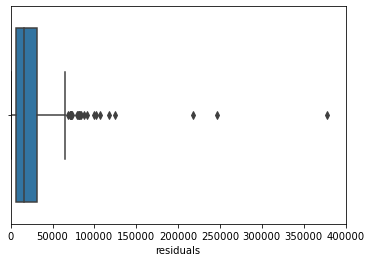

In [31]:
sns.boxplot(x=(ypred_norm - ytest_norm).abs(),data=df)
plt.xlabel("residuals")
plt.xlim(0,400000)
#tried as much as close to zero

RandomForest 

In [32]:
x_feature_train,x_feature_test,y_target_train,y_target_test = train_test_split(x_feature,y_target,test_size=0.2, random_state=42)

In [33]:
rf_reg = RandomForestRegressor()

In [34]:
param = {
    'n_estimators':range(10,200,20),
    'min_samples_leaf':range(1,5,1),
    'max_depth':range(3,20,1),   
}

In [35]:
random = RandomizedSearchCV(estimator=rf_reg,param_distributions=param,
                               cv=10,n_iter=50,
                               scoring='neg_mean_absolute_error',n_jobs=4,
                               verbose=5,
                               return_train_score=True,
                               random_state=42)

In [36]:
#random.fit(x_feature_train,y_target_train)

In [37]:
# random.best_estimator_

In [38]:
rf_reg = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=110, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [39]:
rf_reg.fit(x_feature_train,y_target_train)

RandomForestRegressor(max_depth=15, n_estimators=110)

In [40]:
y_pred  = rf_reg.predict(x_feature_test)

In [41]:
#test rmse
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_target_test,y_pred))

0.18859438255940197

In [42]:
# from sklearn.metrics import r2_score
# print(r2_score(y_target_test, y_pred))

In [43]:
#trainn accuracy
y_pred_train = rf_reg.predict(x_feature_train)

In [44]:
np.sqrt(mean_squared_error(y_target_train,y_pred_train))

0.06538404056227784

In [45]:
# print(r2_score(y_target_train,y_pred_train))